In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer


In [4]:
data = pd.read_csv("./roars.csv")

data.dropna(inplace=True)


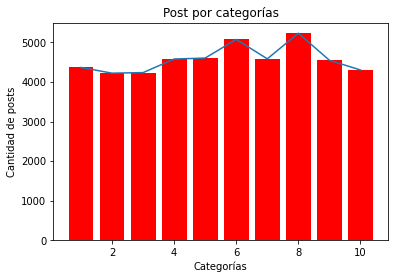

In [10]:
count = data["category"].value_counts()
plt.plot(range(1, 11), [count[i] for i in range(1, 11)],)
plt.bar(range(1, 11), [count[i] for i in range(1, 11)], color="red")
plt.title("Post por categorías")
plt.xlabel("Categorías")
plt.ylabel("Cantidad de posts")
plt.show()


In [1]:
import pandas as pd
import numpy as np
import nltk as text
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import precision_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from contractions import fix
import string
SEED = 42


In [2]:
class PreproccessText:
    def __init__(self):
        self.stop_words = set(text.corpus.stopwords.words(
            "english") + list(string.punctuation))
        self.lemm = text.stem.WordNetLemmatizer().lemmatize

    def fit(self, corpus):
        # ? normalization of str to lower case
        corpus = corpus.lower()
        # ? expand contraction like can't -> cannot
        corpus = fix(corpus)

        # ? tokenize
        word_tokens = text.tokenize.word_tokenize(corpus)
        # ? lemmatize
        word_tokens = [self.lemm(w) for w in word_tokens]
        # ? remove stopwords & punct &
        filtered_sentence = [
            self.lemm(w) for w in word_tokens if w.isalpha and not w in self.stop_words]

        return " ".join(filtered_sentence)


In [5]:
data.roar_text = data["roar_text"].apply(PreproccessText().fit)


In [8]:
data.head()


,id,category,roar_text
0,1,2,doe zebra stripe provides camouflage predator ...
1,2,4,itsy bitsy sipder climb waterspout
2,4,3,woman get pm premenstrual syndrome pm group sy...
3,5,3,co-worker guilty unsanitary hygiene would righ...
4,7,3,risk alternative medicine gigantic question --...


In [9]:
vect = CountVectorizer().fit_transform(data["roar_text"])

In [62]:
X_tr, X_t, Y_tr, Y_t = train_test_split(vect, data["category"])

In [81]:
model = SGDClassifier(learning_rate="constant", eta0=0.1, shuffle=False)

In [82]:
for i in range(X_tr.shape[0]//256):
    batch = vect[i:i+256]
    temp_batch = []

    for j in range(batch.shape[0]):
        temp_batch.append(batch[j].toarray()[0])
    X = np.array(temp_batch)
    Y = Y_tr[i:i+256]
    model.partial_fit(X, Y, list(set(data["category"])))
    


In [83]:
model.predict(vect[0].toarray())

array([8])

In [67]:
data["category"][0]

2

In [41]:
vect[0].toarray()[0]

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
p = model.predict(np.array([vect[i].toarray()[0] for i in range(100)]))

In [57]:
p.shape

(10,)

In [58]:
data["category"][:10].shape

(10,)

In [84]:
model.score(np.array([X_t[i].toarray()[0] for i in range(100)]), Y_t[:100])

0.14